In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(11239, 13)

In [14]:
df['Amount'] = df['Amount'].astype('int')

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

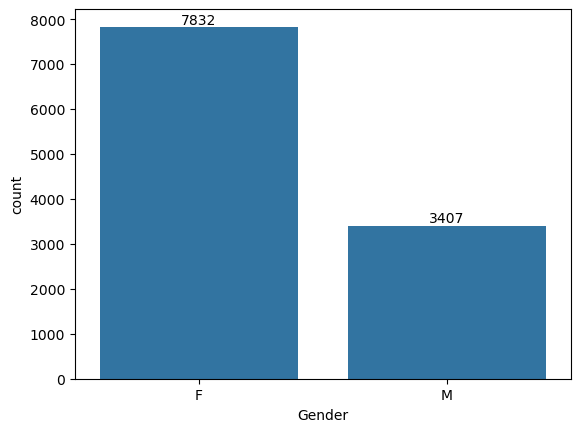

In [20]:
ax= sns.countplot(x = 'Gender' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [24]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)
sales_gen.head()

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot: xlabel='Gender', ylabel='Amount'>

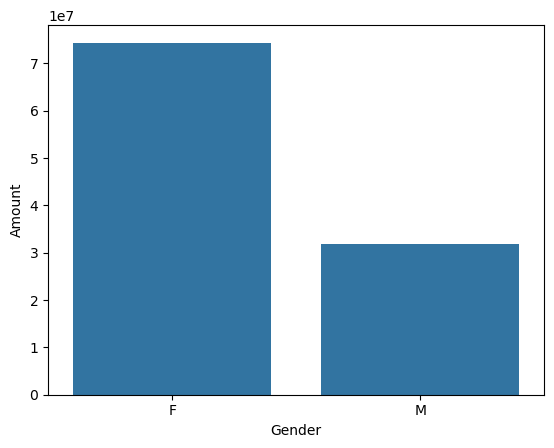

In [22]:
sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gen)

#### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Ages

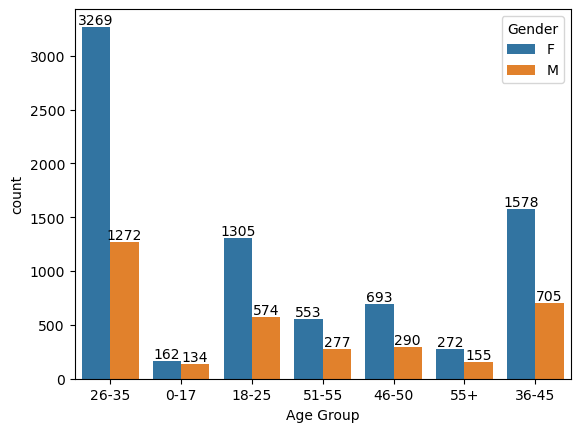

In [26]:
ax= sns.countplot(data = df, x= 'Age Group' , hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [28]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sales_age.head()

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477


<AxesSubplot: xlabel='Age Group', ylabel='Amount'>

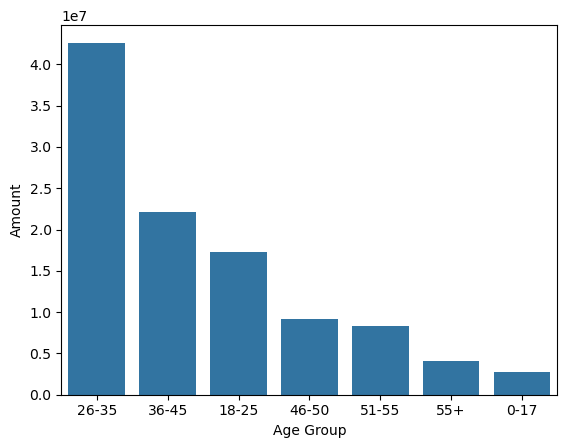

In [29]:
sns.barplot(x = 'Age Group', y= 'Amount', data = sales_age)

#### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

In [38]:
sales_state = df.groupby(['State'] , as_index = False)['Orders'].sum().sort_values(by= 'Orders', ascending = False).head(10)
sales_state.head()

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


<AxesSubplot: xlabel='State', ylabel='Orders'>

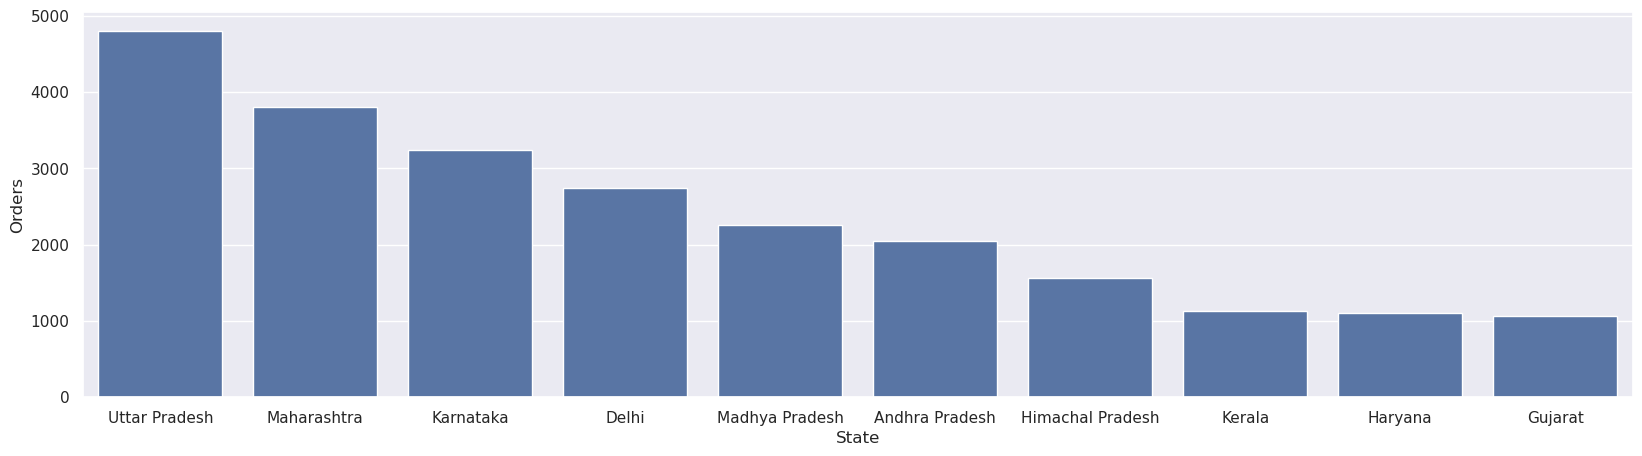

In [41]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x = 'State', y = 'Orders')

In [45]:
sales_state = df.groupby(['State'] , as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False).head(10)
sales_state.head()

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142


<AxesSubplot: xlabel='State', ylabel='Amount'>

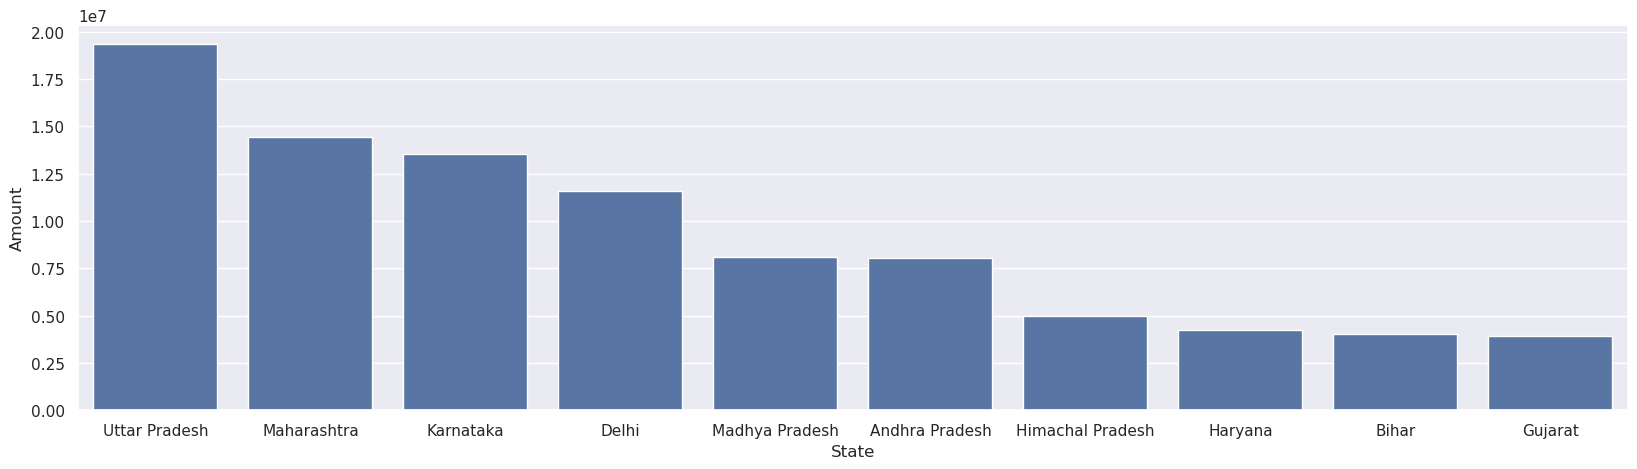

In [46]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x = 'State', y = 'Amount')

### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status

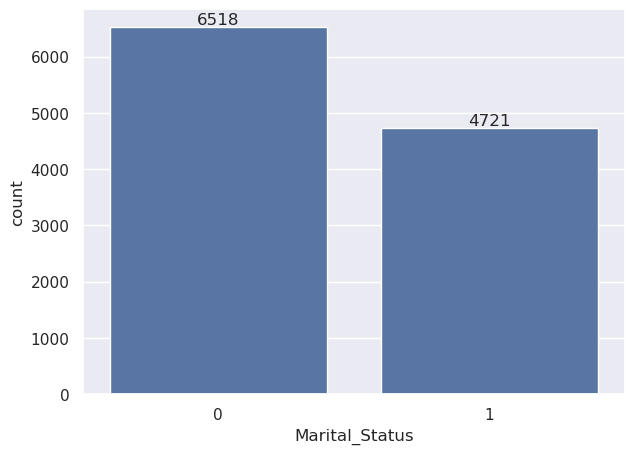

In [54]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

In [50]:
sales_MS = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
sales_MS.head()

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<AxesSubplot: xlabel='Marital_Status', ylabel='Amount'>

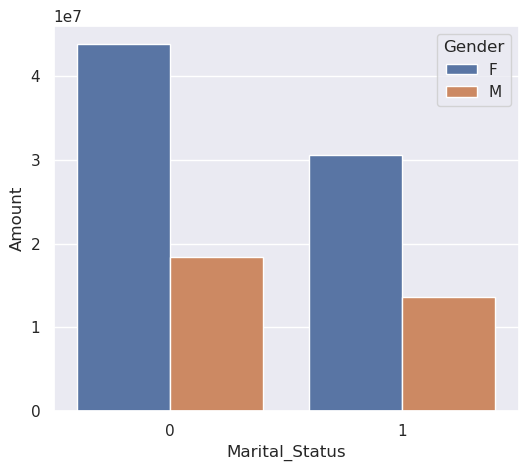

In [53]:
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data= sales_MS, x = 'Marital_Status', y = 'Amount', hue='Gender')

#### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## Occupation

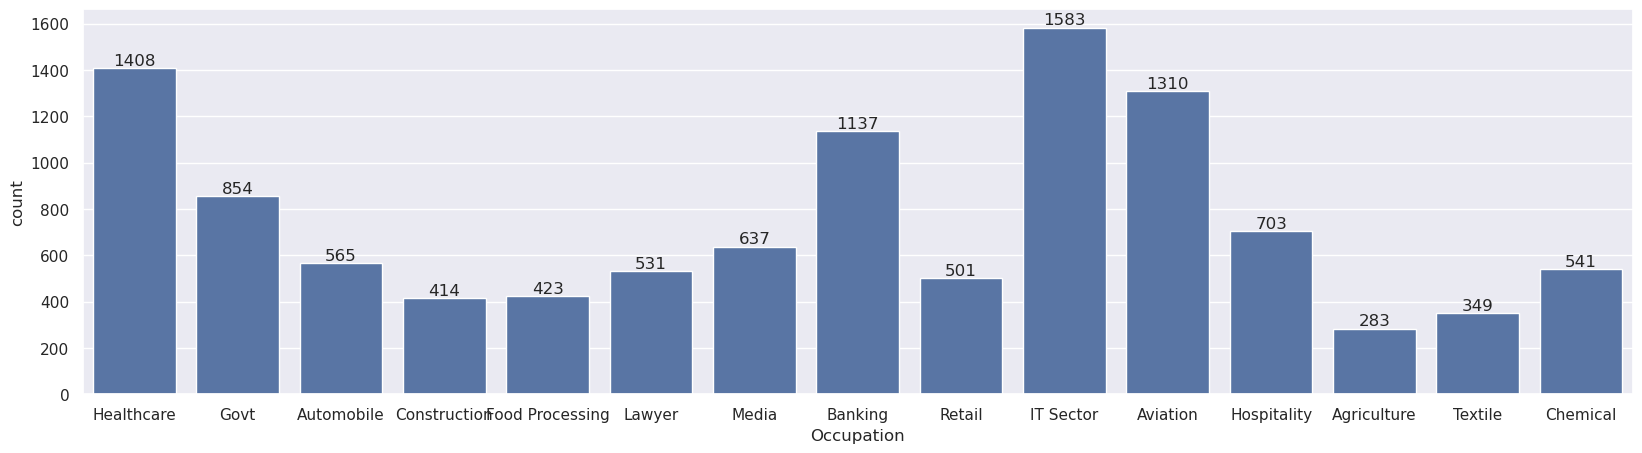

In [55]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot: xlabel='Occupation', ylabel='Amount'>

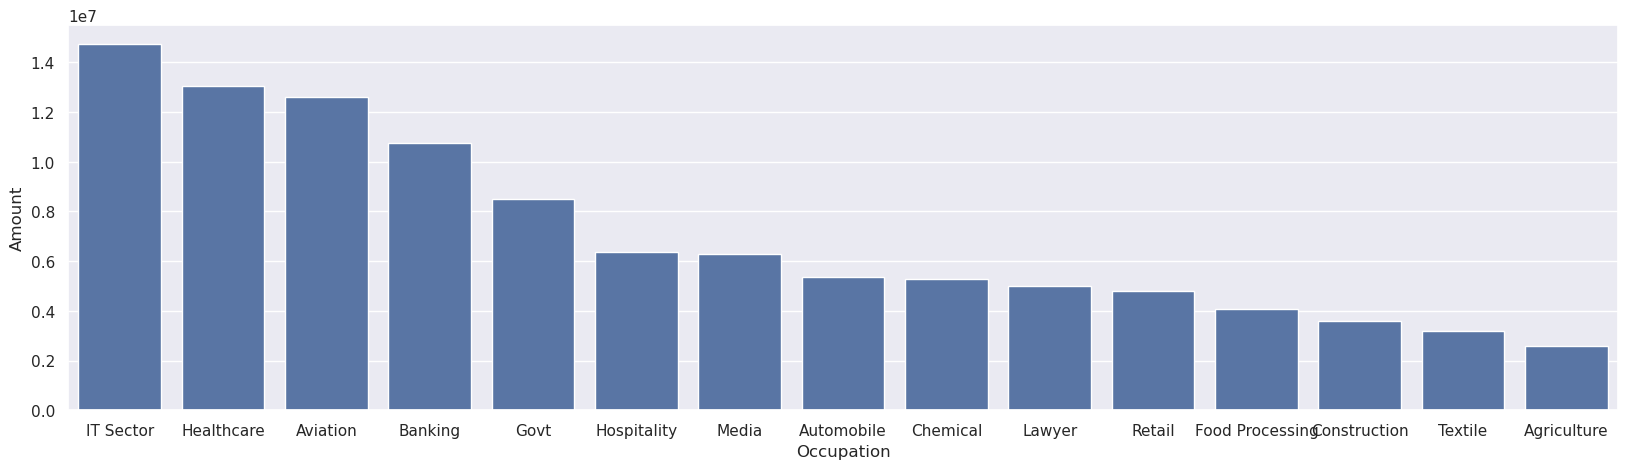

In [61]:
sales_MS = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
sales_MS.head()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_MS, x = 'Occupation', y = 'Amount')

#### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

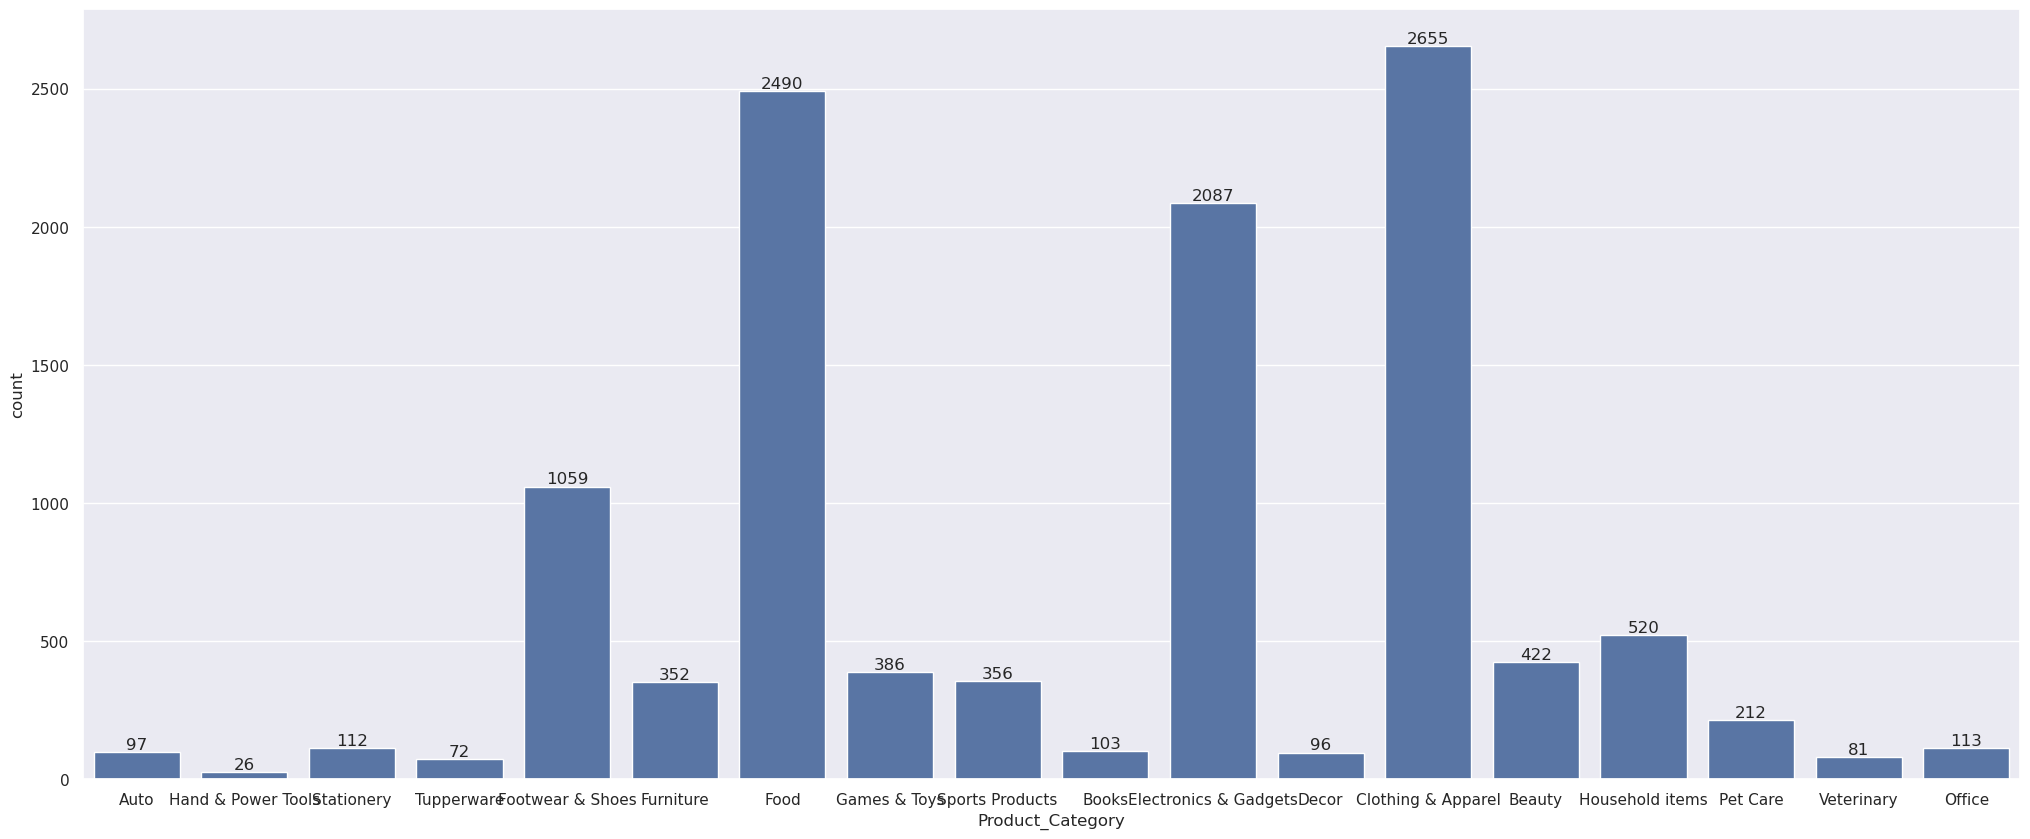

In [64]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot: xlabel='Product_Category', ylabel='Amount'>

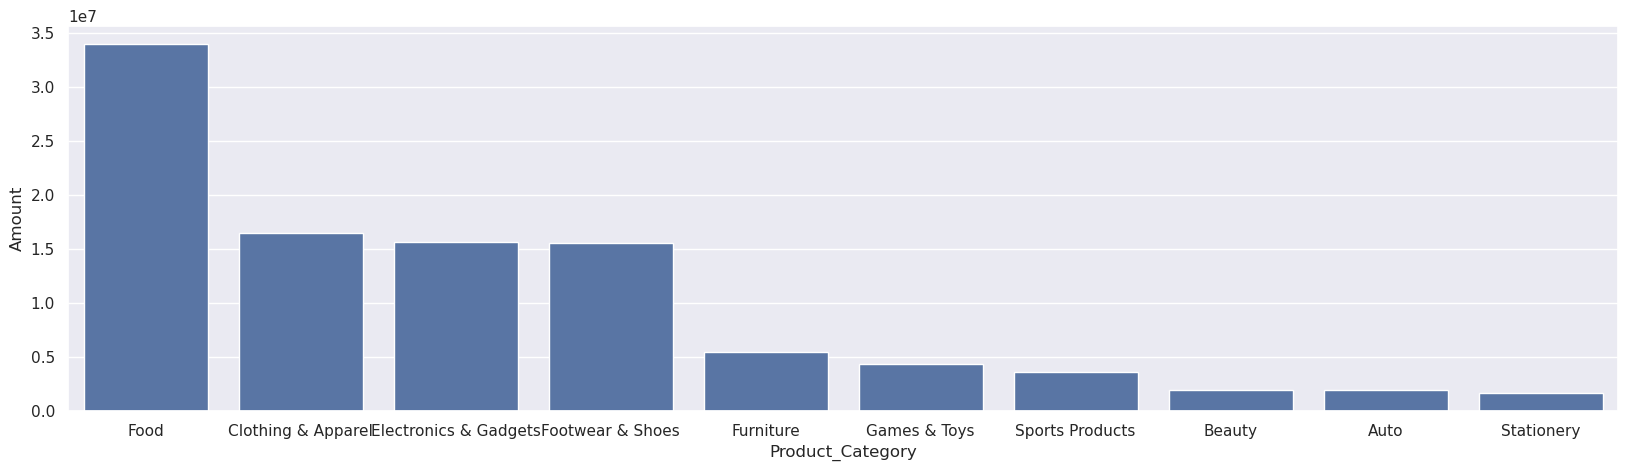

In [66]:
sales_MS = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
sales_MS.head()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_MS, x = 'Product_Category', y = 'Amount')

#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<AxesSubplot: xlabel='Product_ID', ylabel='Orders'>

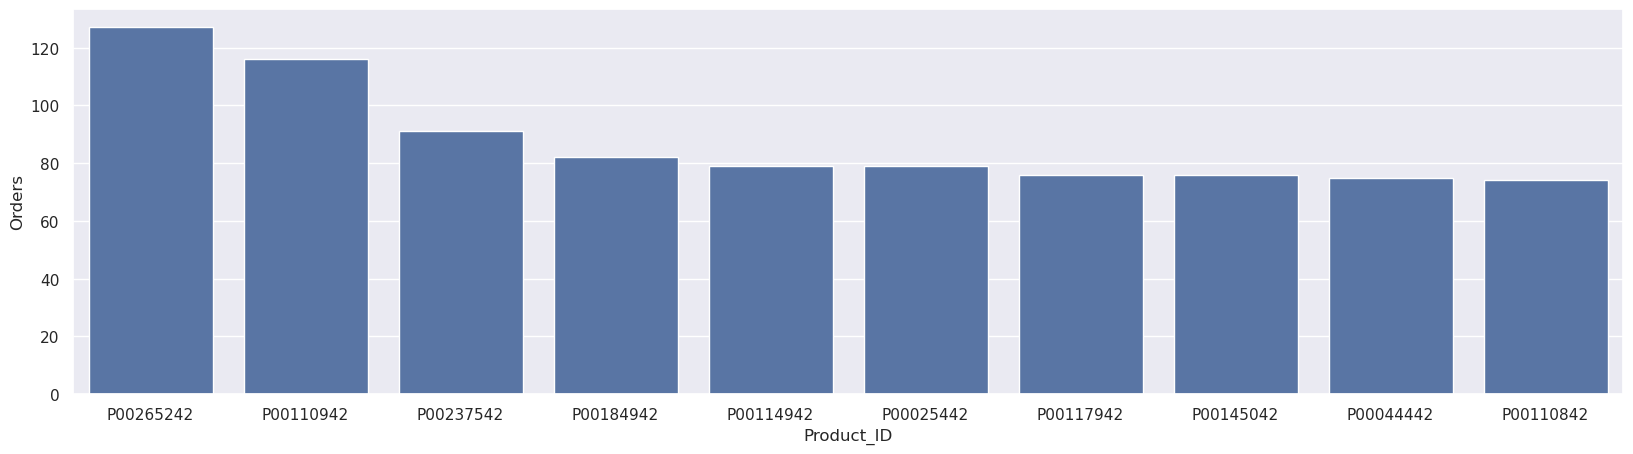

In [67]:
sales_MS = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)
sales_MS.head()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_MS, x = 'Product_ID', y = 'Orders')

# Conclusion

#### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

##### THANK YOU!